In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet
from solver import Solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


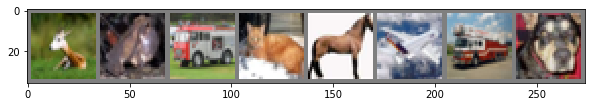

      deer     frog    truck      cat    horse    plane    truck      dog


In [4]:
batch_size = 64

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size)
classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
#net = models.vgg16(pretrained=True)
solver = Solver(net, trainloader, testloader, optim = 'adam', num_epochs=1)

In [6]:
solver.train()

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    1,       100]    2.09959632 |        0.22546875
[    1,       200]    1.84117975 |        0.32515625
[    1,       300]    1.71790447 |        0.37671875
[    1,       400]    1.63307051 |        0.39734375
[    1,       500]    1.61294077 |        0.40359375
[    1,       600]    1.54251404 |        0.44140625
[    1,       700]    1.47995689 |        0.46484375
----------------------------------------------------
[    1,  finished]     accuracy: |        0.47350000 



In [7]:
PATH = './cifar_net.pth'
solver.save_model(PATH)

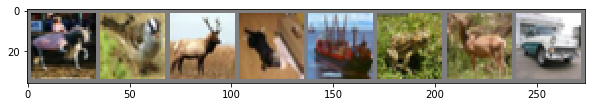

      Real:    horse     bird     deer      cat     ship     frog     deer      car
 Predicted:    horse      dog    horse     deer     ship     deer     deer     ship


In [8]:
solver.predict_samples(classes)

In [9]:
solver.print_class_accuracies(classes)

Accuracy of plane : 43 %
Accuracy of   car : 60 %
Accuracy of  bird : 37 %
Accuracy of   cat : 22 %
Accuracy of  deer : 31 %
Accuracy of   dog : 40 %
Accuracy of  frog : 51 %
Accuracy of horse : 59 %
Accuracy of  ship : 74 %
Accuracy of truck : 52 %


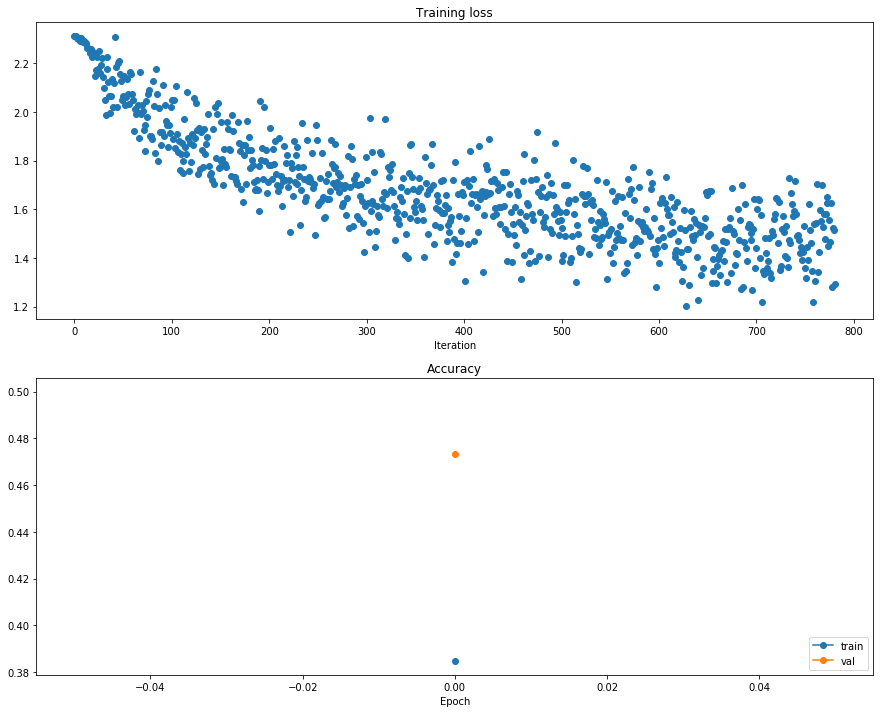

In [10]:
solver.print_plots()